In [1]:
import pandas as pd
df=pd.read_csv('exam6.txt')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0.051267  117 non-null    float64
 1   0.69956   117 non-null    float64
 2   1         117 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


<AxesSubplot:>

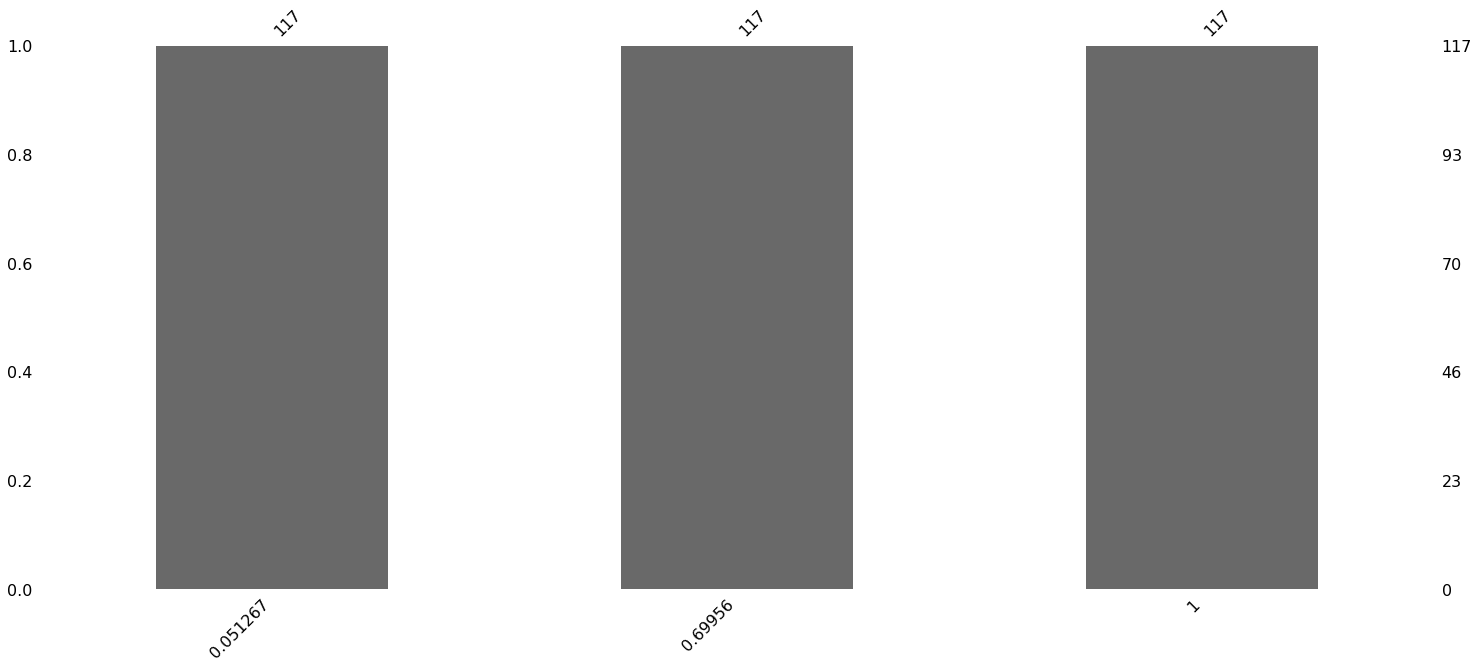

In [3]:
#Checking for Null values
import missingno as msn
msn.bar(df.iloc[:,0:3])

<AxesSubplot:xlabel='count', ylabel='1'>

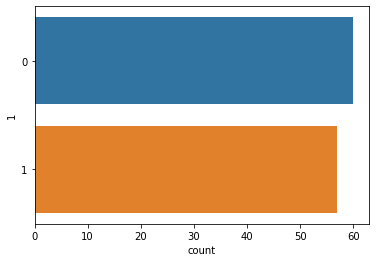

In [15]:
#Checking for class balancing
import seaborn as sns
sns.countplot(y=df.iloc[:,2],data=df)

<AxesSubplot:>

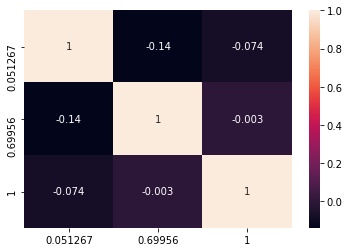

In [8]:
sns.heatmap(df.iloc[:,:3].corr(),annot=True)

In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X=df.iloc[:,0:2]
Y=df.iloc[:,2]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [19]:
n=1000 #number of iterations
alpha=10
m,k=X_train.shape
beta=np.zeros(k)
for i in range(n):
    cost_gradient=np.zeros(k)
    z=X_train.dot(beta)
    predicted=1/(1+np.exp(-z))
    difference=predicted-Y_train
    for j in range(k):
        cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
    for j in range(k):
        beta[j]=beta[j]-(alpha/m)*cost_gradient[j]
print(beta)

[-1.6785379   0.03566675 -0.25690168]
